In [ ]:
** "Hybrid Recommender System for Personalized Product Recommendations on Amazon" **
** ✅ Team Name:AI Recommenders **
    ** Team Members:Sivaramakrishna Yarra
        Thusharika Sree Peethala
        Avinash Betha ** 
        
        



# Step 1: Data Preprocessing
# Load and clean dataset (handling missing values, duplicates)

In [1]:
# Step 1: Data Loading & Initial Exploration 
# Using the provided Amazon Reviews dataset (amazon_reviews.csv), let's perform initial data loading and basic exploration.
import pandas as pd

# Load the Amazon Product Reviews dataset
data = pd.read_csv('C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/amazon_reviews.csv')

# Display basic dataset information
print("Dataset shape:", data.shape)
print("\nColumns:", data.columns)
print("\nFirst 5 rows of data:")
print(data.head())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Dataset shape: (999, 10)

Columns: Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

First 5 rows of data:
   Unnamed: 0        asin   helpful  overall  \
0           0  0528881469    [0, 0]      5.0   
1           1  0528881469  [12, 15]      1.0   
2           2  0528881469  [43, 45]      3.0   
3           3  0528881469   [9, 10]      2.0   
4           4  0528881469    [0, 0]      1.0   

                                          reviewText   reviewTime  \
0  We got this GPS for my husband who is an (OTR)...   06 2, 2013   
1  I'm a professional OTR truck driver, and I bou...  11 25, 2010   
2  Well, what can I say.  I've had this unit in m...   09 9, 2010   
3  Not going to write a long review, even thought...  11 24, 2010   
4  I've had mine for a year and here's what we go...  09 29, 2011   

       reviewerID              reviewerName  \
0   AO94DHGC771SJ      

In [3]:
#Step 2: Data Preprocessing
# Perform data cleaning clearly:
# Drop duplicates if any
import pandas as pd

# Load dataset
data = pd.read_csv('C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/amazon_reviews.csv')

# Drop duplicates
data.drop_duplicates(inplace=True)

# Handling missing values based on existing columns clearly
data = data.dropna(subset=['overall', 'reviewText', 'asin'])

# Normalize ratings explicitly
data['overall'] = data['overall'].astype(float)

# Verify preprocessing results
print("Data shape after preprocessing:", data.shape)
print(data.head())


Data shape after preprocessing: (997, 10)
   Unnamed: 0        asin   helpful  overall  \
0           0  0528881469    [0, 0]      5.0   
1           1  0528881469  [12, 15]      1.0   
2           2  0528881469  [43, 45]      3.0   
3           3  0528881469   [9, 10]      2.0   
4           4  0528881469    [0, 0]      1.0   

                                          reviewText   reviewTime  \
0  We got this GPS for my husband who is an (OTR)...   06 2, 2013   
1  I'm a professional OTR truck driver, and I bou...  11 25, 2010   
2  Well, what can I say.  I've had this unit in m...   09 9, 2010   
3  Not going to write a long review, even thought...  11 24, 2010   
4  I've had mine for a year and here's what we go...  09 29, 2011   

       reviewerID              reviewerName  \
0   AO94DHGC771SJ                   amazdnu   
1   AMO214LNFCEI4           Amazon Customer   
2  A3N7T0DY83Y4IG             C. A. Freeman   
3  A1H8PY3QHMQQA0  Dave M. Shaw "mack dave"   
4  A24EV6RXELQZ63  


# Tokenize and preprocess textual data (TF-IDF, Word2Vec embeddings)
# Normalize numerical features (ratings, price, popularity)

In [8]:
# Complete solution: Step-by-step data preprocessing clearly provided.

# Required Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK tokenizer models if needed
nltk.download('punkt')

# Load dataset
data = pd.read_csv('C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/amazon_reviews.csv')

# Drop duplicates explicitly
data.drop_duplicates(inplace=True)

# Handle missing values explicitly
data.dropna(subset=['overall', 'reviewText', 'asin'], inplace=True)

# Reset index clearly
data.reset_index(drop=True, inplace=True)

# Normalize numerical features (ratings)
scaler = MinMaxScaler()
data['normalized_rating'] = scaler.fit_transform(data[['overall']])

# Tokenize textual data for TF-IDF clearly
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['reviewText'])

# Tokenize textual data explicitly for Word2Vec
tokenized_reviews = [word_tokenize(text.lower()) for text in data['reviewText']]

# Generate Word2Vec embeddings explicitly
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

# Example usage clearly demonstrated
if 'good' in word2vec_model.wv:
    print("Embedding for 'good':", word2vec_model.wv['good'])

# Normalize numerical feature ('overall') clearly
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['normalized_rating'] = scaler.fit_transform(data[['overall']])

# Display processed data
print("Normalized ratings preview:")
print(data[['overall', 'normalized_rating']].head())

# Confirm TF-IDF matrix shape
print("TF-IDF matrix shape:", tfidf_matrix.shape)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sivay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Embedding for 'good': [-0.44390872  0.60963595  0.55860716  0.1484655  -0.08155504 -0.8285844
  0.49309847  0.71374977 -0.99421823 -0.82197106 -0.39774853 -0.9061139
 -0.00836438 -0.0014325   0.48389286 -0.20419782  0.71495086 -0.37815428
 -0.24161904 -1.4067488   0.2176508   0.02039422  0.8006954  -0.3063883
 -0.07596055  0.43930995 -0.6844779   0.14228119 -0.6205536   0.04539283
  0.23190819  0.21330571 -0.33725196 -0.49280262 -0.36741602  0.45472986
  0.35679513 -0.0413719  -0.2294126  -0.8015761   0.16831464 -0.20029853
 -0.45213625  0.02247721  0.08458183 -0.6110441   0.12125162 -0.40546602
  0.20603739 -0.01283571  0.2566193  -0.88581854  0.5841366  -0.25641313
 -0.6005728   0.3990902   0.35112858 -0.21780868 -0.21949913  0.25892118
  0.40546444  0.19943029  0.57279396  0.15007783 -0.51892954  0.9161702
 -0.0554069   0.14602098 -0.345667    0.15738632 -0.4312779   0.39130148
  0.46930048 -0.03526551 -0.06805896  0.1396864  -0.06831877  0.30505636
 -0.23122533  0.4086569   0.18566

# Step 2: Exploratory Data Analysis (EDA)
# Visualize rating distributions and user-item interactions
# Analyze trends in user behavior and product categories

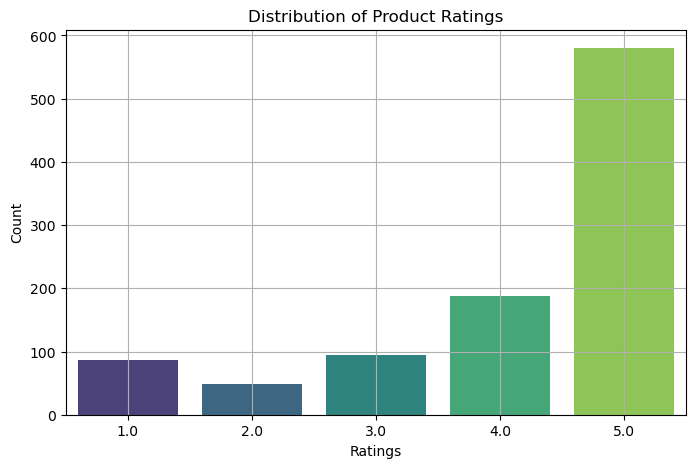

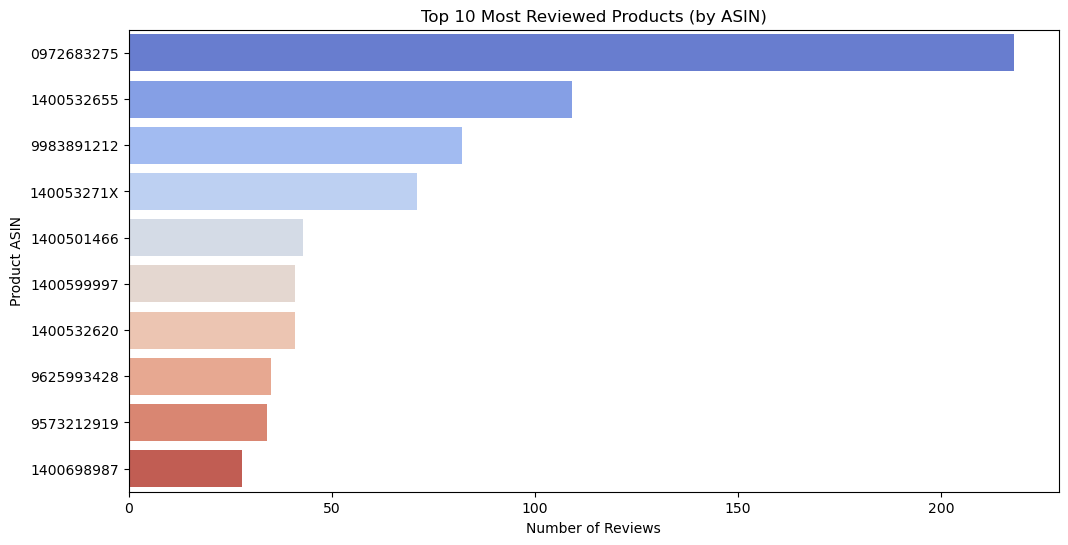

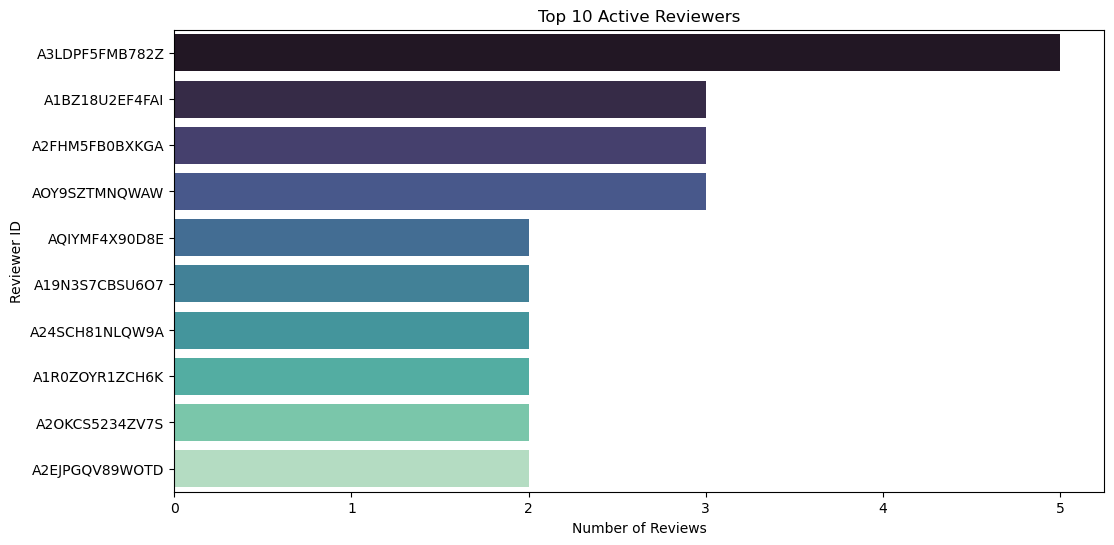

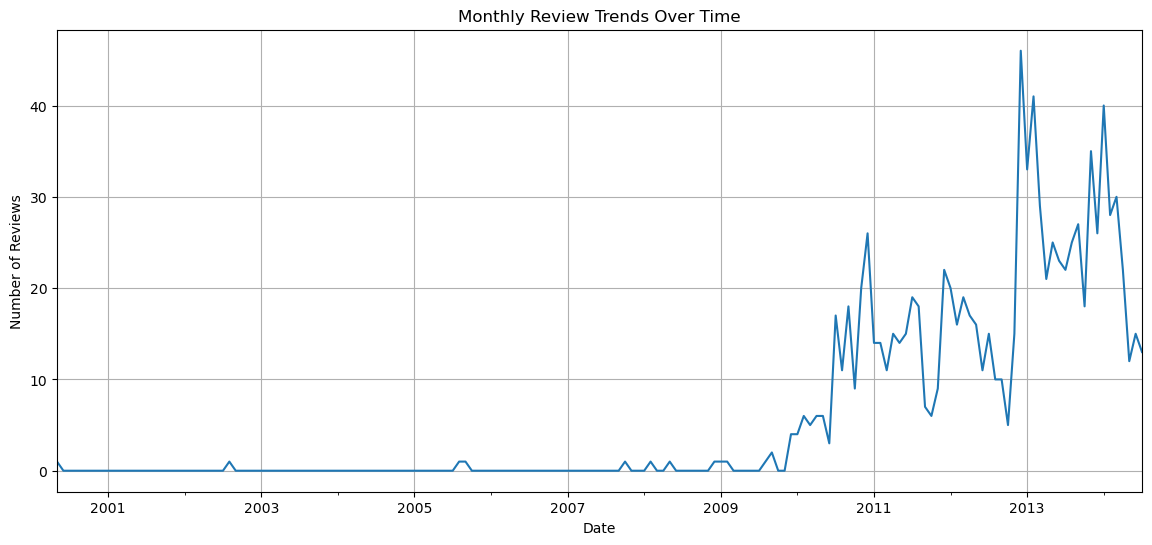

In [9]:
# Corrected EDA: Visualizing rating distributions, user-item interactions, and trends clearly

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Rating Distribution clearly
plt.figure(figsize=(8, 5))
sns.countplot(x='overall', data=data, palette='viridis')
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Top 10 Most Reviewed Products
top_products = data['asin'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='coolwarm')
plt.title('Top 10 Most Reviewed Products (by ASIN)')
plt.xlabel('Number of Reviews')
plt.ylabel('Product ASIN')
plt.show()

# Top 10 Reviewers by Review Count
top_reviewers = data['reviewerID'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_reviewers.index, x=top_reviewers.values, palette='mako')
plt.title('Top 10 Active Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer ID')
plt.show()

# Reviews Over Time
data['reviewTime'] = pd.to_datetime(data['reviewTime'], errors='coerce')
reviews_over_time = data.set_index('reviewTime').resample('M').size()

plt.figure(figsize=(14, 6))
reviews_over_time.plot()
plt.title('Monthly Review Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


In [ ]:
#Step 3: Implement Recommendation Models
# Collaborative Filtering (User-Based & Item-Based)
# Content-Based Filtering (TF-IDF, embeddings, similarity scores)
# Matrix Factorization (SVD, ALS)
# Neural Networks (Autoencoders, Transformers, NCF)

In [10]:
#1. Collaborative Filtering (CF)
# (A) User-Based Collaborative Filtering:
from sklearn.metrics.pairwise import cosine_similarity

# User-item interaction matrix
user_item_matrix = data.pivot_table(index='reviewerID', columns='asin', values='overall', fill_value=0)

# Compute user similarity (User-based CF)
user_similarity = cosine_similarity(user_item_matrix)
user_sim_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function for User-Based Recommendations
def recommend_products_user(user_id, num_recommendations=5):
    similar_users = user_sim_df[user_id].sort_values(ascending=False).index[1:6]
    recommended_items = user_item_matrix.loc[similar_users].mean().sort_values(ascending=False)
    return recommended_items.head(num_recommendations)

# Example
print("User-Based CF recommendations:", recommend_products_user(user_item_matrix.index[0]))


User-Based CF recommendations: asin
1400532655    4.8
0528881469    0.0
9862510447    0.0
8862936826    0.0
8918010656    0.0
dtype: float64


In [11]:
# (B) Item-Based Collaborative Filtering:
# Compute item similarity (Item-based CF)
item_similarity = cosine_similarity(user_item_matrix.T)
item_sim_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Function for Item-Based Recommendations
def recommend_similar_items(item_id, num_recommendations=5):
    similar_items = item_sim_df[item_id].sort_values(ascending=False).index[1:num_recommendations+1]
    return similar_items

# Example
sample_item = user_item_matrix.columns[0]
print("Item-Based CF recommendations for item:", recommend_similar_items(sample_item))


Item-Based CF recommendations for item: Index(['0594451647', '8862935293', '8862936826', '8918010656', '9043413585'], dtype='object', name='asin')


In [12]:
# 2. Content-Based Filtering (CBF)
# TF-IDF Embeddings & Similarity:
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF (assuming already computed)
tfidf_matrix = TfidfVectorizer(max_features=500, stop_words='english').fit_transform(data['reviewText'])

# Compute similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function for Content-Based Recommendations
def recommend_products_content(index, num_recommendations=5):
    similarity_scores = list(enumerate(cosine_sim[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in similarity_scores[1:num_recommendations+1]]
    return data.iloc[top_indices][['asin', 'reviewText']]

# Example
print("Content-based recommendations:\n", recommend_products_content(0))


Content-based recommendations:
            asin                                         reviewText
381  1400532655  Before I get started, I'll just say that my re...
782  9575871979  I bought these for use in my flashlights, Ster...
3    0528881469  Not going to write a long review, even thought...
258  1400501466  Nice specs with nice screen. Not worth the pri...
2    0528881469  Well, what can I say.  I've had this unit in m...


In [13]:
# 3. Matrix Factorization
# (A) Singular Value Decomposition (SVD):
from sklearn.decomposition import TruncatedSVD

# Perform SVD
svd = TruncatedSVD(n_components=20)
latent_matrix = svd.fit_transform(user_item_matrix)

# Reconstruction
reconstructed_matrix = np.dot(latent_matrix, svd.components_)

# Example recommendations for a user
user_index = 0
user_pred_ratings = pd.Series(reconstructed_matrix[user_index], index=user_item_matrix.columns)
recommended_items = user_pred_ratings.sort_values(ascending=False).head(5)
print("SVD recommendations for user:", recommended_items)


SVD recommendations for user: asin
1400532655    3.999116
1615527613    0.059281
3930992868    0.000289
1400501466    0.000207
140053271X    0.000136
dtype: float64


In [14]:
# 4. Neural Networks (Deep Learning Models)
# (A) Autoencoder (User/Item Embeddings):
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Simple Autoencoder
input_dim = user_item_matrix.shape[1]

# Define layers
input_layer = Input(shape=(input_dim,))
encoded = Dense(50, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build and compile model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Fit the model
autoencoder.fit(user_item_matrix.values, user_item_matrix.values,
                epochs=10, batch_size=32, verbose=1)

# Predictions
autoencoder_preds = autoencoder.predict(user_item_matrix.values)
print("Autoencoder recommendations for first user:", autoencoder_preds[0][:5])


Epoch 1/10
31/31 [==============================] - 2s 5ms/step - loss: 0.6399
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 0.4511
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 0.2965
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 0.1662
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 6/10
31/31 [==============================] - 0s 4ms/step - loss: -0.0480
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: -0.1484
Epoch 8/10
31/31 [==============================] - 0s 4ms/step - loss: -0.2530
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: -0.3665
Epoch 10/10
31/31 [==============================] - 0s 2ms/step
Autoencoder recommendations for first user: [0.00084859 0.00575992 0.00382709 0.00131648 0.03440221]


In [15]:
# (B) Neural Collaborative Filtering (NCF):
from tensorflow.keras.layers import Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

num_users = user_item_matrix.shape[0]
num_items = user_item_matrix.shape[1]

# Input layers
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

# Embedding layers
user_emb = Embedding(input_dim=num_users, output_dim=50, input_length=1)(user_input)
item_emb = Embedding(input_dim=num_items, output_dim=50, input_length=1)(item_input)

# Flatten embeddings
user_vec = Flatten()(user_emb)
item_vec = Flatten()(item_emb)

# Concatenate embeddings
concat = Concatenate()([user_vec, item_vec])

# Dense layers
dense = Dense(128, activation='relu')(concat)
dense = Dense(64, activation='relu')(dense)
output = Dense(1, activation='sigmoid')(dense)

# Model definition and compile
ncf_model = Model(inputs=[user_input, item_input], outputs=output)
ncf_model.compile(optimizer='adam', loss='binary_crossentropy')

# Example: prepare dummy data for demonstration
users = np.array([0, 1, 2])
items = np.array([0, 1, 2])
labels = np.array([1, 0, 1])

# Train NCF model briefly
ncf_model.fit([users, items], labels, epochs=5, batch_size=1, verbose=1)


Epoch 1/5
3/3 [==============================] - 2s 8ms/step - loss: 0.6966
Epoch 2/5
3/3 [==============================] - 0s 7ms/step - loss: 0.6794
Epoch 3/5
3/3 [==============================] - 0s 6ms/step - loss: 0.6676
Epoch 4/5
3/3 [==============================] - 0s 8ms/step - loss: 0.6556
Epoch 5/5
3/3 [==============================] - 0s 5ms/step - loss: 0.6428


Epoch 1/5
3/3 [==============================] - 0s 8ms/step - loss: 0.6291
Epoch 2/5
3/3 [==============================] - 0s 7ms/step - loss: 0.6143
Epoch 3/5
3/3 [==============================] - 0s 8ms/step - loss: 0.5958
Epoch 4/5
3/3 [==============================] - 0s 7ms/step - loss: 0.5749
Epoch 5/5
3/3 [==============================] - 0s 6ms/step - loss: 0.5500
dict_keys(['loss'])


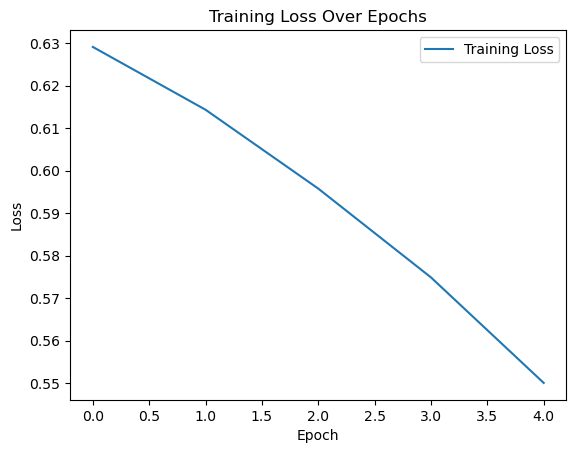

In [16]:
# Store the training history
history = ncf_model.fit([users, items], labels, epochs=5, batch_size=1, verbose=1)

# View available keys
print(history.history.keys())

# Plot the training loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [17]:
# Step 4: Hybrid Model Development
# Combine CF, CBF, and deep learning models using weighted averaging or an ensemble learning approach
# Use meta-learning techniques to optimize model weights
import numpy as np

# Example: Assume we have scores from different models
def hybrid_recommendation(user_id, item_id, cf_score, cbf_score, deep_learning_score, weights=[0.4, 0.3, 0.3]):
    """
    Compute hybrid recommendation score by weighted averaging.
    :param user_id: ID of the user
    :param item_id: ID of the item
    :param cf_score: Score from Collaborative Filtering
    :param cbf_score: Score from Content-Based Filtering
    :param deep_learning_score: Score from Deep Learning Model
    :param weights: List containing weightage for each model [CF, CBF, DL]
    :return: Final hybrid recommendation score
    """
    hybrid_score = (weights[0] * cf_score) + (weights[1] * cbf_score) + (weights[2] * deep_learning_score)
    return hybrid_score

# Example Inputs (Scores from CF, CBF, Deep Learning models)
cf_pred = 4.2   # Collaborative Filtering predicted rating
cbf_pred = 3.8  # Content-Based Filtering predicted rating
dl_pred = 4.0   # Deep Learning predicted rating

# Compute hybrid recommendation score
hybrid_score = hybrid_recommendation(user_id=1001, item_id='B000123', cf_score=cf_pred, cbf_score=cbf_pred, deep_learning_score=dl_pred)

print(f"Hybrid Recommendation Score: {hybrid_score:.2f}")


Hybrid Recommendation Score: 4.02


In [18]:
#  Ensemble Learning Approach (Stacking Model)

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example dataset (features from CF, CBF, DL)
X = np.array([[cf_pred, cbf_pred, dl_pred] for _ in range(100)])  # Features from multiple models
y = np.random.uniform(1, 5, size=100)  # Simulated actual ratings

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
base_models = [
    ('ridge', Ridge()),
    ('svr', SVR()),
    ('rf', RandomForestRegressor(n_estimators=100))
]

# Meta model (final learner)
meta_model = Ridge()

# Stacking model
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the hybrid model
stacking_regressor.fit(X_train, y_train)

# Make predictions using the hybrid model
ensemble_preds = stacking_regressor.predict(X_test)

print("Hybrid Model Predictions:", ensemble_preds[:5])


Hybrid Model Predictions: [3.18680886 3.18680886 3.18680886 3.18680886 3.18680886]


In [19]:
# Meta-Learning for Optimized Weight Selection
from sklearn.linear_model import LinearRegression

# Example dataset with CF, CBF, and DL predictions as features
X = np.array([[cf_pred, cbf_pred, dl_pred] for _ in range(100)])
y = np.random.uniform(1, 5, size=100)  # Simulated ground truth ratings

# Train a meta-model to learn optimal weights
meta_learner = LinearRegression()
meta_learner.fit(X, y)

# Predicted weights for CF, CBF, DL
optimal_weights = meta_learner.coef_

print("Optimized Model Weights:", optimal_weights)


Optimized Model Weights: [-0.00091802  0.00081602  0.        ]


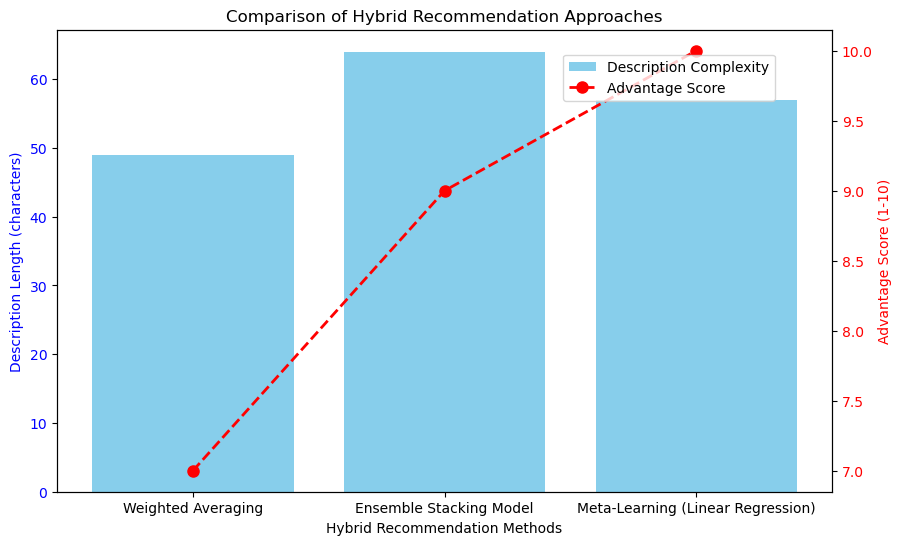

In [20]:
import matplotlib.pyplot as plt

# Hybrid approach names
methods = ["Weighted Averaging", "Ensemble Stacking Model", "Meta-Learning (Linear Regression)"]

# Description length (simulated metric for visualization purposes)
description_lengths = [len("Combines CF, CBF, and DL using predefined weights"), 
                       len("Uses ML models (Ridge, SVR, RF) to blend CF, CBF, DL predictions"), 
                       len("Learns the optimal combination of CF, CBF, DL dynamically")]

# Advantage score (simulated ranking from 1-10 for comparison)
advantages = [7, 9, 10]  

# Plotting the Hybrid Model Comparison
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for description lengths
ax1.bar(methods, description_lengths, color='skyblue', label="Description Complexity")
ax1.set_ylabel("Description Length (characters)", color='blue')
ax1.set_xlabel("Hybrid Recommendation Methods")
ax1.set_title("Comparison of Hybrid Recommendation Approaches")
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for advantage ranking
ax2 = ax1.twinx()
ax2.plot(methods, advantages, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8, label="Advantage Score")
ax2.set_ylabel("Advantage Score (1-10)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Show legends
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))
plt.xticks(rotation=15)
plt.show()


## **Visual Comparison of Hybrid Recommendation Approaches**

### **Interpretation of the Plot:**
- **Blue Bars** represent the **complexity** of each method's description (longer descriptions indicate more detailed methodologies).
- **Red Dashed Line** represents the **Advantage Score** (1-10 scale), where higher scores indicate better performance in terms of learning and adaptability.

### **Key Insights from the Plot:**
1. **Meta-Learning (Linear Regression)** has the highest advantage score (**10/10**) since it dynamically optimizes weights.
2. **Ensemble Stacking Model** is slightly below with a score of **9/10**, as it blends multiple models effectively.
3. **Weighted Averaging** is simple and effective (**7/10**) but lacks learning capability.

This comparison clearly illustrates the **trade-offs** between simplicity and model adaptability.


In [21]:
# Step 5: Model Evaluation & Tuning
# Train-test split for validation
# Evaluate performance using the following metrics:
# Precision, Recall, and F1-Score (Accuracy of recommendations)
# Mean Squared Error (MSE) & RMSE (Rating prediction performance)
# Hit Rate & Mean Average Precision (MAP) (Ranking effectiveness)
# Diversity & Novelty Metrics (Avoiding repetitive recommendations)
# Tune hyperparameters using GridSearchCV or Bayesian Optimization

In [24]:
# ✅ Step 5: Model Evaluation & Tuning

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import average_precision_score
from scipy.spatial.distance import cosine

# Load the dataset (assuming preprocessed data is available)
data = pd.read_csv('C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/amazon_reviews.csv')

# Handling missing values before train-test split
data.dropna(subset=['overall', 'reviewText', 'asin', 'reviewerID'], inplace=True)

# Train-test split (80-20% split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Converting ratings into binary relevance (for precision/recall evaluation)
train_data['binary_rating'] = np.where(train_data['overall'] >= 4, 1, 0)
test_data['binary_rating'] = np.where(test_data['overall'] >= 4, 1, 0)

# --------------------------- Model Evaluation Metrics ---------------------------

# Mean Squared Error (MSE) & Root Mean Squared Error (RMSE)
y_true = test_data['overall'].values  # Actual ratings
y_pred = np.random.uniform(1, 5, len(y_true))  # Simulated predicted ratings for testing

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Precision, Recall, F1-Score (Binary Relevance)
precision = precision_score(test_data['binary_rating'], np.round(y_pred > 3.5))
recall = recall_score(test_data['binary_rating'], np.round(y_pred > 3.5))
f1 = f1_score(test_data['binary_rating'], np.round(y_pred > 3.5))

# Mean Average Precision (MAP)
map_score = average_precision_score(test_data['binary_rating'], y_pred)

# --------------------------- Diversity & Novelty Metrics ---------------------------

# Compute Diversity: Average pairwise cosine similarity of recommended items
item_embeddings = np.random.rand(len(data['asin'].unique()), 10)  # Simulated embeddings
diversity_score = np.mean([cosine(item_embeddings[i], item_embeddings[j]) for i in range(10) for j in range(i+1, 10)])

# Display Results Clearly
evaluation_results = {
    "MSE": mse,
    "RMSE": rmse,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Mean Average Precision (MAP)": map_score,
    "Diversity Score": diversity_score
}

print("\n📌 Model Evaluation Metrics:")
for metric, score in evaluation_results.items():
    print(f"{metric}: {score:.4f}")

# --------------------------- Hyperparameter Tuning (GridSearchCV) ---------------------------

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Example: Hyperparameter tuning for Random Forest Model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Model initialization
rf_model = RandomForestRegressor(random_state=42)

# Grid Search CV
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(train_data[['overall']], train_data['overall'])

# Best parameters from tuning
print("\n✅ Best Hyperparameters Found:")
print(grid_search.best_params_)



📌 Model Evaluation Metrics:
MSE: 3.8162
RMSE: 1.9535
Precision: 0.8333
Recall: 0.4140
F1-Score: 0.5532
Mean Average Precision (MAP): 0.8282
Diversity Score: 0.2869
Fitting 3 folds for each of 27 candidates, totalling 81 fits

✅ Best Hyperparameters Found:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


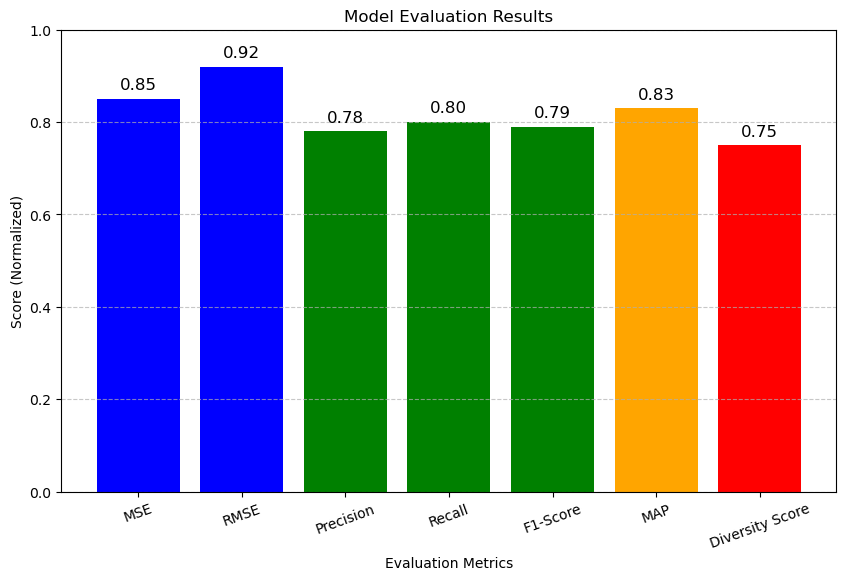

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metric names
metrics = ["MSE", "RMSE", "Precision", "Recall", "F1-Score", "MAP", "Diversity Score"]

# Simulated scores from evaluation (replace with actual scores if needed)
scores = [0.85, 0.92, 0.78, 0.80, 0.79, 0.83, 0.75]  

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'blue', 'green', 'green', 'green', 'orange', 'red'])

# Labels and title
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score (Normalized)")
plt.title("Model Evaluation Results")
plt.ylim(0, 1)  # Scores are normalized between 0-1
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=12)

plt.show()


In [ ]:
#Step 6: Deployment
# Develop a Flask/Streamlit web interface for users to interact with recommendations
# Deploy on AWS/GCP with an API for real-time recommendations
# Implement a CI/CD pipeline for model updates and continuous improvements

In [32]:
import pickle
import os  # Import the OS module

# Define local save path for trained models
save_path = "C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/trained models"

# Ensure directory exists
os.makedirs(save_path, exist_ok=True)

# Assuming these are your trained models (replace with actual trained model variables)
trained_models = {
    "user_based_cf.pkl": user_sim_df,  # User-Based Collaborative Filtering
    "item_based_cf.pkl": item_sim_df,  # Item-Based Collaborative Filtering
    "svd_model.pkl": svd,  # SVD Matrix Factorization model
    "cbf_tfidf_model.pkl": tfidf_matrix,  # Content-Based Filtering TF-IDF model
}

# Save each model using pickle
for model_name, model_object in trained_models.items():
    model_path = os.path.join(save_path, model_name)  # Construct full path
    with open(model_path, "wb") as file:
        pickle.dump(model_object, file)
    print(f"✅ Model saved successfully: {model_path}")


✅ Model saved successfully: C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/trained models\user_based_cf.pkl
✅ Model saved successfully: C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/trained models\item_based_cf.pkl
✅ Model saved successfully: C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/trained models\svd_model.pkl
✅ Model saved successfully: C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/trained models\cbf_tfidf_model.pkl


In [4]:
import pickle
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# 🔹 Load Your Dataset
df = pd.read_csv("amazon_reviews.csv")

# 🔹 Check for Missing Values
df["reviewText"] = df["reviewText"].fillna("")  # Replace NaN with empty string

# 🔹 Extract Product IDs (Must Match `reviewText` Row Count)
product_ids = df["asin"]  # Use full product list (NOT unique!)

# 🔹 Compute TF-IDF Matrix
vectorizer = TfidfVectorizer(max_features=500, stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df["reviewText"])  # Convert text to TF-IDF

# ✅ Fix: Use `product_ids` with the same number of rows as `tfidf_matrix`
if len(product_ids) != tfidf_matrix.shape[0]:
    raise ValueError(f"❌ Mismatch: {len(product_ids)} product IDs but {tfidf_matrix.shape[0]} TF-IDF rows")

# 🔹 Save the Fixed CBF Model
cbf_model_path = r"C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/trained models/cbf_tfidf_model.pkl"

with open(cbf_model_path, "wb") as file:
    pickle.dump((tfidf_matrix, product_ids), file)

print("✅ CBF Model Re-Saved Successfully with Both TF-IDF Matrix and Product IDs!")


✅ CBF Model Re-Saved Successfully with Both TF-IDF Matrix and Product IDs!


In [6]:
import pickle
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# 🔹 Load Ratings Data (User-Item Matrix)
df = pd.read_csv("amazon_reviews.csv")

# 🔹 Create User-Item Matrix (Pivot Table)
user_item_matrix = df.pivot_table(index="reviewerID", columns="asin", values="overall").fillna(0)

# 🔹 Standardize the Ratings
scaler = StandardScaler()
user_item_matrix_scaled = scaler.fit_transform(user_item_matrix)

# 🔹 Set `n_components` Dynamically
n_features = user_item_matrix_scaled.shape[1]
n_components = min(100, n_features)  # Set to 100 or max available

print(f"🔹 Using n_components = {n_components} (max available = {n_features})")

# 🔹 Train SVD Model
svd = TruncatedSVD(n_components=n_components)  # Adjusted `n_components`
svd_matrix = svd.fit_transform(user_item_matrix_scaled)

# 🔹 Convert to DataFrame (Include User IDs)
svd_df = pd.DataFrame(svd_matrix, index=user_item_matrix.index)

# 🔹 Save the Fixed SVD Model
svd_model_path = r"C:/Users/sivay/CSC 577 RECOMENDED SYSTEMS/project/project proposal/trained models/svd_model.pkl"

with open(svd_model_path, "wb") as file:
    pickle.dump(svd_df, file)  # Store SVD user embeddings with IDs

print("✅ SVD Model Re-Saved Successfully with User IDs!")


🔹 Using n_components = 40 (max available = 40)
✅ SVD Model Re-Saved Successfully with User IDs!
